In [1]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(grid)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [2]:
juegos <- read.csv("data\\Base de datos 25 de octubre.csv") 

# Filtrar por juegos desde los años 2000 en adelante
juegos <- juegos %>% filter(Year >= 2000) 

# Crear un vector de colores para cada categoría de Genre
colores <- c("#E41A1C", "#377EB8", "#4DAF4A", "#FF7F00", "#F781BF", "#A65628", 
             "#984EA3", "#999999", "#FFD700", "#008080", "#FF6347", "#8B4513")

## Justificación de selección de datos

In [3]:
# Filtrar datos según el genero de fighting
juegos_sports <- juegos %>% filter(Genre == 'Fighting')

# Seleccionar los fabricantes con mayor ventas en el genero fighting
juegos_sports_grouped <- juegos_sports %>%
  group_by(Platform_Manufacturer) %>%
  summarise(Total = sum(Sales)) %>%
  arrange(desc(Total))

# Mostrar df
juegos_sports_grouped


Platform_Manufacturer,Total
<chr>,<dbl>
Sony,184.20
Nintendo,71.97
Microsoft,52.45
Sega,0.78
Other,0.08


Sony, Nintendo y Microsoft son los top 3 fabricantes en ventas de videojuegos de pelea entre los años 2000-2015

# Preguntas

## ¿Cuál es la tendencia de la venta de videojuegos?

`summarise()` has grouped output by 'Genre'. You can override using the
`.groups` argument.
`geom_smooth()` using formula = 'y ~ x'


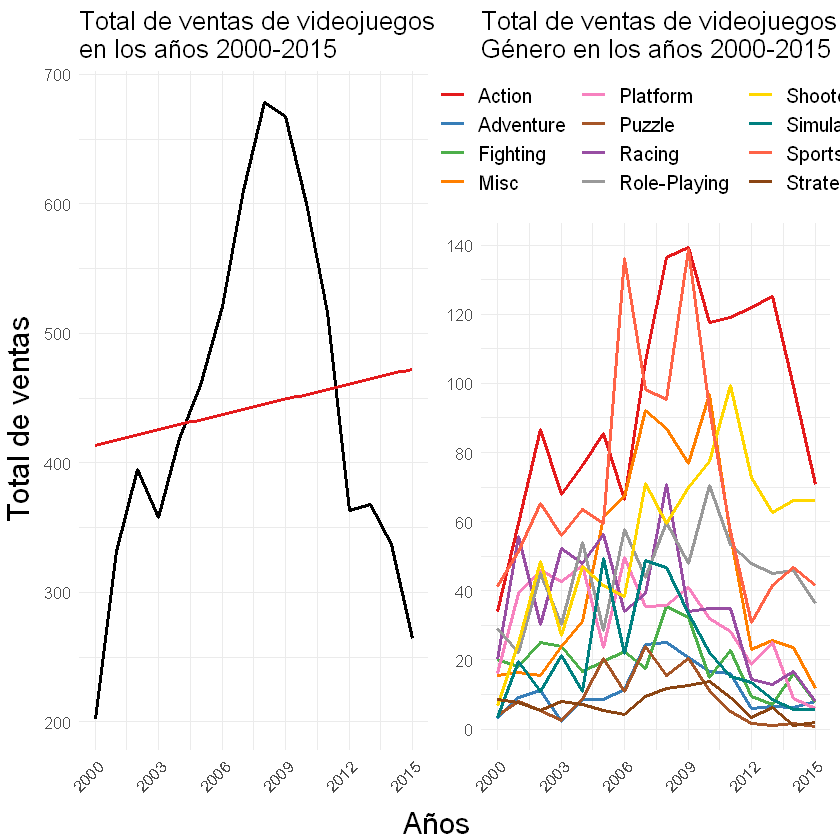

In [4]:
####
# Grafico 1:
# Total de ventas por año

data <- juegos %>%

    # Preparar datos
    group_by(Year) %>%
    summarise(Sales1 = sum(Sales)) 

gg1 <-# Crear gráfico
    ggplot(data) +
        geom_line(aes(x = Year, y = Sales1, group = 1), lwd = 1) +
        stat_smooth(aes(x = Year, y = Sales1), method = 'lm', se = FALSE, color = colores[1]) + 
        scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
        guides(x = guide_axis(angle = 45)) + 
        theme_minimal() +
        theme(
            text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
            title = element_text(size = 13),  # Ajustar el tamaño de fuente del título
            axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
            axis.title.y = element_text(size = 13)   # Ajustar el tamaño de fuente del título del eje y
          ) +
          labs(
            title = 'Total de ventas de videojuegos\nen los años 2000-2015',
            y = NULL,
            x = NULL
          )

##############
### Grafico 2:
# Total de ventas por año por género

# Procesar datos
data <- juegos %>%
    group_by(Genre, Year) %>%
    summarise(Sales1 = sum(Sales))


# Crear el gráfico ggplot con los colores personalizados
gg2 <- ggplot(data) +
  geom_line(aes(x = Year, y = Sales1, color = Genre), lwd = 1) +
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_y_continuous(breaks = seq(0, 140, by = 20)) +
  scale_color_manual(values = colores) +  # Asignar colores manualmente
  guides(x = guide_axis(angle = 45)) + 
  guides(color = guide_legend(nrow = 4)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 13, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.title.y = element_text(size = 13)  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = NULL,
    title = 'Total de ventas de videojuegos por\nGénero en los años 2000-2015',
    y = NULL,
    x = NULL
  )

# Juntar los dos gráficos creados
grid_arrange <- grid.arrange(
    gg1,gg2 ,
    ncol = 2,
    # Wirte left text
    left = textGrob("Total de ventas", rot = 90, 
                    gp = gpar(fontsize=18)),
    # Wirte bottom text
    bottom = textGrob("Años", gp=gpar(fontsize = 18))
)


ggsave("graphs\\p1_tendencia.pdf", plot = arrangeGrob(grid_arrange), device = "pdf",
      width = 26, height = 16, units = "cm", dpi = 600)

## ¿Cuál es la tendencia de la venta de los juegos de pelea?

`summarise()` has grouped output by 'es.fight'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'es.fight'. You can override using the
`.groups` argument.


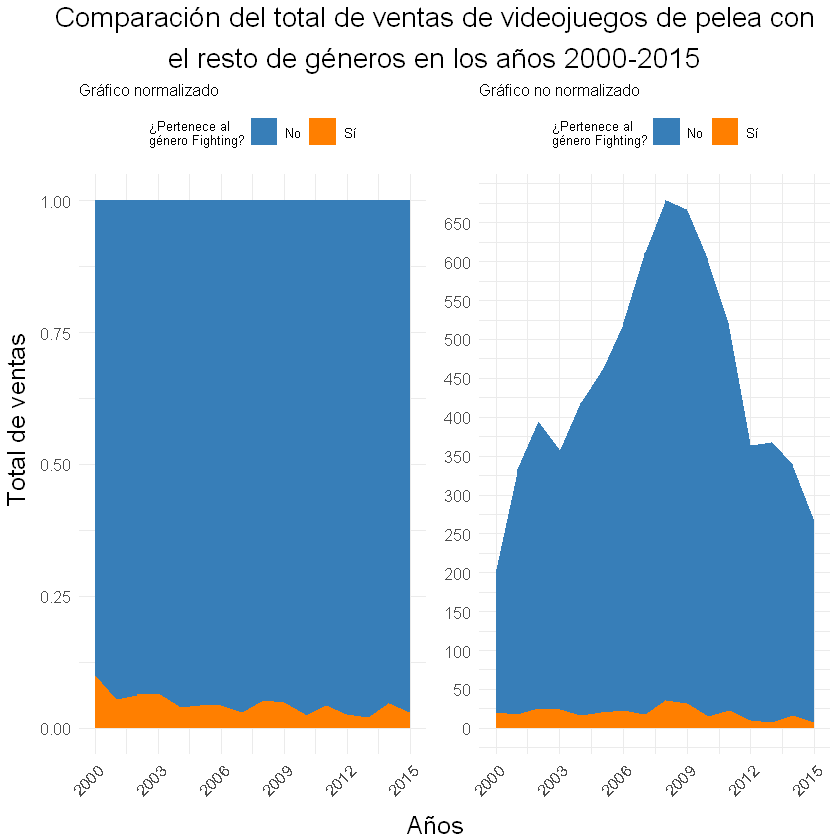

In [5]:
## ¿Cuál es la tendencia de la venta de juegos de pelea?

data <-  juegos  %>% 
  mutate(es.fight = as.factor(ifelse(Genre == "Fighting", 1, 0))) %>%
  group_by(es.fight, Year) %>%
  summarise(Sales1 = sum(Sales))


gg1 <- ggplot(data) +
  geom_area(aes(x = Year, y = Sales1, fill = es.fight), position = 'fill') + 
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_fill_manual(values = c(colores[2], colores[4]), 
                    labels = c("No", "Sí")) +  # Cambiar nombres en la leyenda
  guides(x = guide_axis(angle = 45)) + 
  theme_minimal() + 
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 8, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.title.y = element_text(size = 13)  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    fill = '¿Pertenece al\ngénero Fighting?',
    title = 'Gráfico normalizado',
    y = NULL,
    x = NULL
  )





## ¿Cuál es la tendencia de la venta de juegos de pelea?

data <-  juegos  %>% 
  mutate(es.fight = as.factor(ifelse(Genre == "Fighting", 1, 0))) %>%
  group_by(es.fight, Year) %>%
  summarise(Sales1 = sum(Sales))


gg2 <- ggplot(data) +
  geom_area(aes(x = Year, y = Sales1, fill = es.fight)) + 
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_y_continuous(breaks = seq(0, 650, by = 50)) +
  scale_fill_manual(values = c(colores[2], colores[4]), 
                    labels = c("No", "Sí")) +  # Cambiar nombres en la leyenda
  guides(x = guide_axis(angle = 45)) + 
  theme_minimal() + 
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 8, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.title.y = element_text(size = 13)  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    fill = '¿Pertenece al\ngénero Fighting?',
    title = 'Gráfico no normalizado',
    y = NULL,
    x = NULL
  )




# Juntar los dos gráficos creados
grid_arrange <- grid.arrange(
    gg1,gg2 ,
    ncol = 2,
    # Wirte left text
    left = textGrob("Total de ventas", rot = 90, 
                    gp = gpar(fontsize=15)),
    # Wirte bottom text
    bottom = textGrob("Años", gp=gpar(fontsize = 15)),
    
    top = textGrob("Comparación del total de ventas de videojuegos de pelea con\nel resto de géneros en los años 2000-2015", gp=gpar(fontsize = 17))
)


ggsave("graphs\\p2_ventasFighting.pdf", plot = arrangeGrob(grid_arrange), device = "pdf",
      width = 26, height = 16, units = "cm", dpi = 600)



### ¿Cómo se desglosan las ventas por maker y por región la venta de shooters?

`summarise()` has grouped output by 'Platform_Manufacturer'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Platform_Manufacturer'. You can override
using the `.groups` argument.


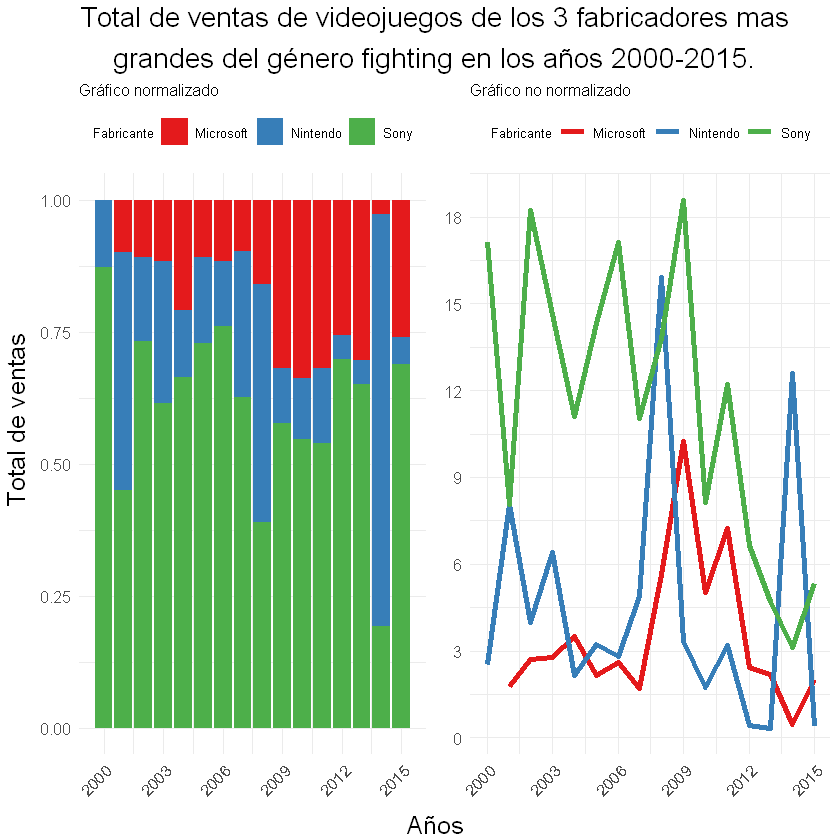

In [6]:
data <- juegos %>%
 filter(Genre == "Fighting" & between(Year, 2000, 2015) & Platform_Manufacturer != 'Other' & Platform_Manufacturer != 'Sega') %>%
 group_by(Platform_Manufacturer, Year) %>%
 summarise(Sales1 = sum(Sales)) 

gg1 <- ggplot(data) +
 geom_col(aes(x = Year, y = Sales1, group = Platform_Manufacturer, fill = Platform_Manufacturer), position="fill") +
 scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) + 
 scale_fill_manual(values = colores) +  # Asignar colores manualmente
 guides(x = guide_axis(angle = 45)) + 
   theme_minimal() + 
  theme(
    legend.position = "top",  
    legend.direction = "horizontal",  
    text = element_text(size = 12),  
    title = element_text(size = 8, hjust = 0.5),  
    legend.text = element_text(size = 8),  
    axis.title.x = element_text(size = 13),  
    axis.title.y = element_text(size = 13)  
  ) +
  labs(
    fill = 'Fabricante',
    title = 'Gráfico normalizado',
    y = NULL,
    x = NULL
  )


data <- juegos %>%
 filter(Genre == "Fighting" & between(Year, 2000, 2015) & Platform_Manufacturer != 'Other' & Platform_Manufacturer != 'Sega') %>%
 group_by(Platform_Manufacturer, Year) %>%
 summarise(Sales1 = sum(Sales))

gg2 <-  ggplot(data) + 
    geom_line(aes(x = Year, y = Sales1, color = Platform_Manufacturer), lwd = 1.5) +
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_y_continuous(breaks = seq(0, 21, by = 3)) +
  scale_color_manual(values = colores) +  # Asignar colores manualmente
  guides(x = guide_axis(angle = 45)) + 
  guides(color = guide_legend(nrow = 1)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 8, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.title.y = element_text(size = 13)  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = 'Fabricante',
    title = 'Gráfico no normalizado',
    y = NULL,
    x = NULL
  )


# Juntar los dos gráficos creados
grid_arrange <- grid.arrange(
    gg1,gg2 ,
    ncol = 2,
    # Wirte left text
    left = textGrob("Total de ventas", rot = 90, 
                    gp = gpar(fontsize=15)),
    # Wirte bottom text
    bottom = textGrob("Años", gp=gpar(fontsize = 15)),
    
    top = textGrob("Total de ventas de videojuegos de los 3 fabricadores mas\ngrandes del género fighting en los años 2000-2015.", gp=gpar(fontsize = 17))
)


ggsave("graphs\\p2_manufacturers.pdf", plot = arrangeGrob(grid_arrange), device = "pdf",
      width = 26, height = 16, units = "cm", dpi = 600)


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


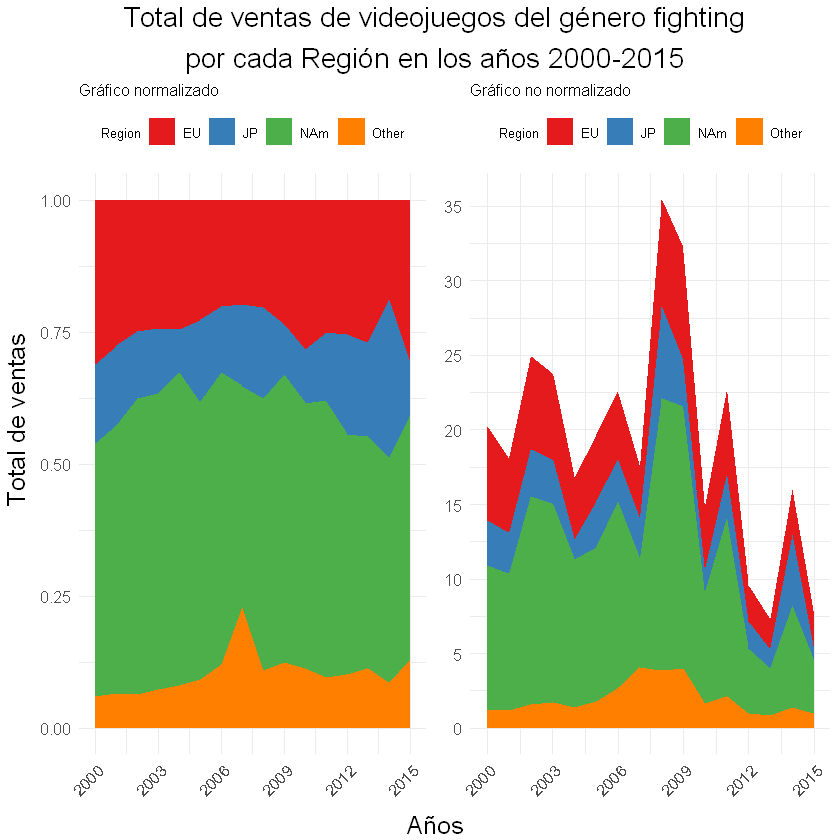

In [7]:
data <- juegos %>%
 filter(Genre == "Fighting" & between(Year, 2000, 2015)) %>%
 group_by(Year,Region) %>%
 summarise(Sales1 = sum(Sales))


gg1 <- ggplot(data) +
 geom_area(aes(x = Year, y = Sales1, group = Region, fill = Region), position = "fill")+
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_fill_manual(values = colores) +  # Asignar colores manualmente
  guides(x = guide_axis(angle = 45)) + 
  guides(color = guide_legend(nrow = 1)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 8, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.title.y = element_text(size = 13)  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = NULL,
    title = 'Gráfico normalizado',
    y = NULL,
    x = NULL
  )


gg2 <- ggplot(data) +
 geom_area(aes(x = Year, y = Sales1, group = Region, fill = Region), position = "stack") + 
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_y_continuous(breaks = seq(0, 40, by = 5)) +
  scale_fill_manual(values = colores) +  # Asignar colores manualmente
  guides(x = guide_axis(angle = 45)) + 
  guides(color = guide_legend(nrow = 1)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 8, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.title.y = element_text(size = 13)  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = NULL,
    title = 'Gráfico no normalizado',
    y = NULL,
    x = NULL
  )

# Juntar los dos gráficos creados
grid_arrange <- grid.arrange(
    gg1,gg2 ,
    ncol = 2,
    # Wirte left text
    left = textGrob("Total de ventas", rot = 90, 
                    gp = gpar(fontsize=15)),
    # Wirte bottom text
    bottom = textGrob("Años", gp=gpar(fontsize = 15)),
    
    top = textGrob("Total de ventas de videojuegos del género fighting\npor cada Región en los años 2000-2015", gp=gpar(fontsize = 17))
)


ggsave("graphs\\p2_region.pdf", plot = arrangeGrob(grid_arrange), device = "pdf",
      width = 26, height = 16, units = "cm", dpi = 600)


## ¿Qué ciclo de vida en ventas podemos esperar por consola?

`summarise()` has grouped output by 'Platform'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Platform'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Platform'. You can override using the
`.groups` argument.


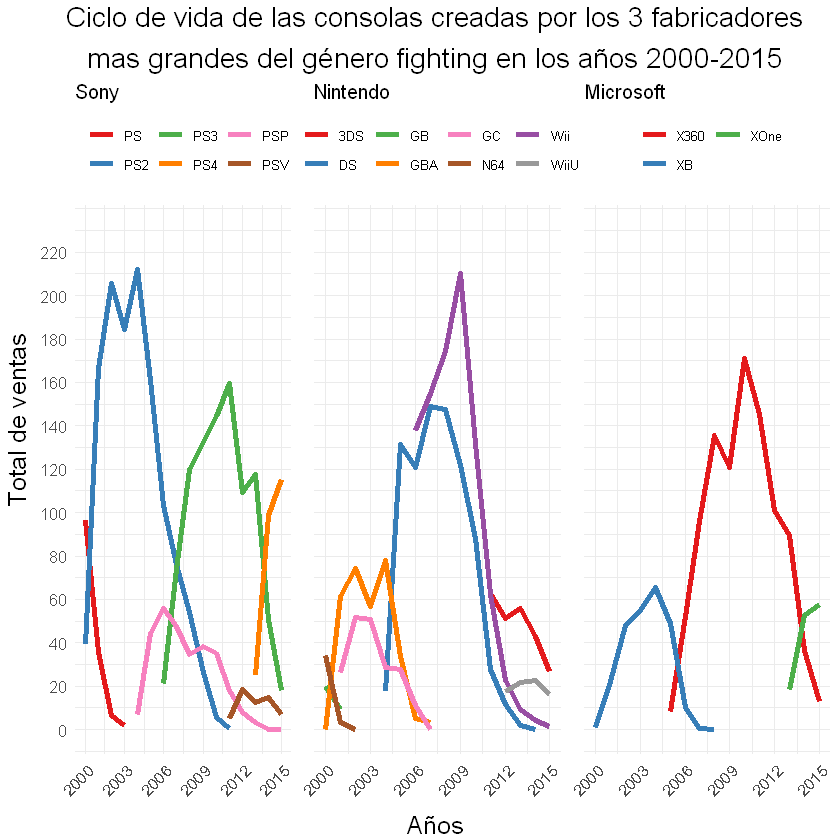

In [8]:
######## SONY
data <- juegos %>% filter(Platform_Manufacturer == "Sony" & Year >= 2000) %>%
 group_by(Platform, Year) %>%
 summarise(Sales1 = sum(Sales))


gg1 <-  ggplot(data) +
 geom_line(aes(x = Year, y = Sales1, color = Platform, group = Platform), lwd = 1.5) +
 guides(x = guide_axis(angle = 45)) + 
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_y_continuous(limits = c(0, 230), breaks = seq(0, 230, by = 20)) + 
  scale_color_manual(values = colores) +  # Asignar colores manualmente
  guides(color = guide_legend(nrow = 2)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 10, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.title.y = element_text(size = 13)  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = NULL,
    title = 'Sony',
    y = NULL,
    x = NULL
  )


######## NINTENDO
data <- juegos %>% filter(Platform_Manufacturer == "Nintendo" & Year >= 2000) %>%
 group_by(Platform, Year) %>%
 summarise(Sales1 = sum(Sales))


gg2 <-  ggplot(data) +
 geom_line(aes(x = Year, y = Sales1, color = Platform, group = Platform), lwd = 1.5) +
 guides(x = guide_axis(angle = 45)) + 
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_y_continuous(limits = c(0, 230), breaks = seq(0, 230, by = 20)) + 
  scale_color_manual(values = colores) +  # Asignar colores manualmente
  guides(color = guide_legend(nrow = 2)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 10, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.text.y = element_blank()  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = NULL,
    title = 'Nintendo',
    y = NULL,
    x = NULL
  )


######## MICROSOFT
data <- juegos %>% filter(Platform_Manufacturer == "Microsoft" & Year >= 2000) %>%
 group_by(Platform, Year) %>%
 summarise(Sales1 = sum(Sales))


gg3 <-  ggplot(data) +
 geom_line(aes(x = Year, y = Sales1, color = Platform, group = Platform), lwd = 1.5) +
 guides(x = guide_axis(angle = 45)) + 
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_y_continuous(limits = c(0, 230), breaks = seq(0, 230, by = 20)) + 
  scale_color_manual(values = colores) +  # Asignar colores manualmente
  guides(color = guide_legend(nrow = 2)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 10, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.text.y = element_blank()  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = NULL,
    title = 'Microsoft',
    y = NULL,
    x = NULL
  ) 

# Juntar los dos gráficos creados
grid_arrange <- grid.arrange(
    gg1,gg2, gg3,
    ncol = 3,

    # Wirte left text
    left = textGrob("Total de ventas", rot = 90, 
                    gp = gpar(fontsize=15)),
    # Wirte bottom text
    bottom = textGrob("Años", gp=gpar(fontsize = 15)),
    
    top = textGrob("Ciclo de vida de las consolas creadas por los 3 fabricadores\nmas grandes del género fighting en los años 2000-2015", gp=gpar(fontsize = 17))
)


ggsave("graphs\\p3_consola.pdf", plot = arrangeGrob(grid_arrange), device = "pdf",
      width = 26, height = 16, units = "cm", dpi = 600)


`summarise()` has grouped output by 'Platform'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Platform'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Platform'. You can override using the
`.groups` argument.


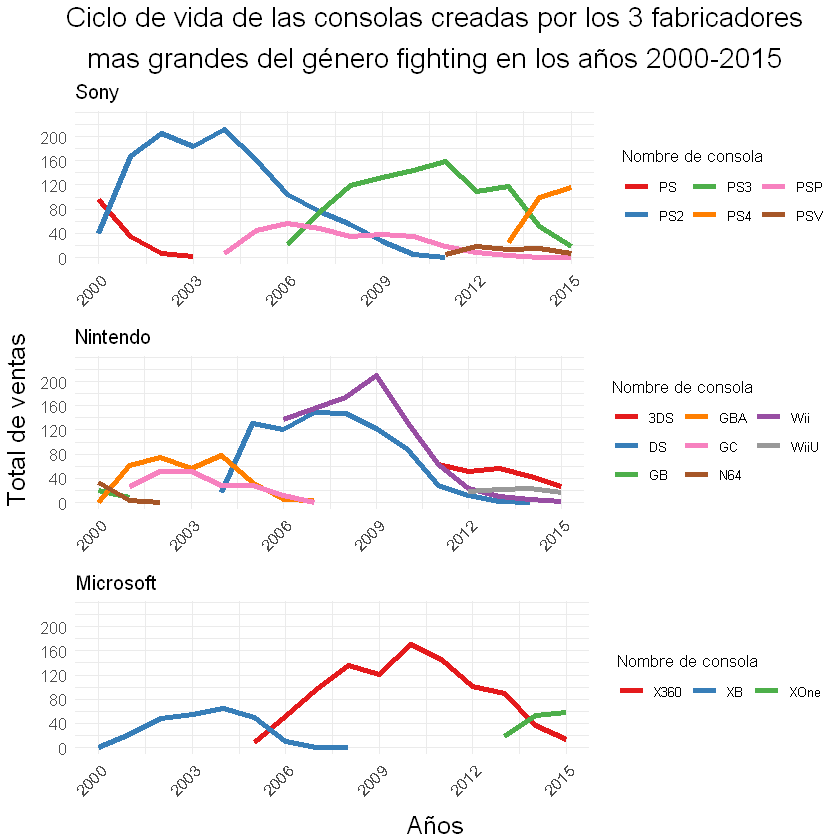

In [11]:
######## SONY
data <- juegos %>% filter(Platform_Manufacturer == "Sony" & Year >= 2000) %>%
 group_by(Platform, Year) %>%
 summarise(Sales1 = sum(Sales))


gg1 <-  ggplot(data) +
 geom_line(aes(x = Year, y = Sales1, color = Platform, group = Platform), lwd = 1.5) +
 guides(x = guide_axis(angle = 45)) + 
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_y_continuous(limits = c(0, 230), breaks = seq(0, 230, by = 40)) + 
  scale_color_manual(values = colores) +  # Asignar colores manualmente
  guides(color = guide_legend(ncol = 3)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "right",  # Posicionar la leyenda en la parte superior
    legend.direction = "vertical",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 10, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.title.y = element_text(size = 13)  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = 'Nombre de consola',
    title = 'Sony',
    y = NULL,
    x = NULL
  )


######## NINTENDO
data <- juegos %>% filter(Platform_Manufacturer == "Nintendo" & Year >= 2000) %>%
 group_by(Platform, Year) %>%
 summarise(Sales1 = sum(Sales))


gg2 <-  ggplot(data) +
 geom_line(aes(x = Year, y = Sales1, color = Platform, group = Platform), lwd = 1.5) +
 guides(x = guide_axis(angle = 45)) + 
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_y_continuous(limits = c(0, 230), breaks = seq(0, 230, by = 40)) + 
  scale_color_manual(values = colores) +  # Asignar colores manualmente
  guides(color = guide_legend(ncol = 3)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "right",  # Posicionar la leyenda en la parte superior
    legend.direction = "vertical",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 10, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.title.y = element_text(size = 13)  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = 'Nombre de consola',
    title = 'Nintendo',
    y = NULL,
    x = NULL
  )


######## MICROSOFT
data <- juegos %>% filter(Platform_Manufacturer == "Microsoft" & Year >= 2000) %>%
 group_by(Platform, Year) %>%
 summarise(Sales1 = sum(Sales))


gg3 <-  ggplot(data) +
 geom_line(aes(x = Year, y = Sales1, color = Platform, group = Platform), lwd = 1.5) +
 guides(x = guide_axis(angle = 45)) + 
  scale_x_continuous(breaks = seq(min(data$Year), max(data$Year), by = 3)) +
  scale_y_continuous(limits = c(0, 230), breaks = seq(0, 230, by = 40)) + 
  scale_color_manual(values = colores) +  # Asignar colores manualmente
  guides(color = guide_legend(ncol = 3)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "right",  # Posicionar la leyenda en la parte superior
    legend.direction = "vertical",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 10, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.title.y = element_text(size = 13)  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = 'Nombre de consola',
    title = 'Microsoft',
    y = NULL,
    x = NULL
  ) 

# Juntar los dos gráficos creados
grid_arrange <- grid.arrange(
    gg1,gg2, gg3,
    ncol = 1,

    # Wirte left text
    left = textGrob("Total de ventas", rot = 90, 
                    gp = gpar(fontsize=15)),
    # Wirte bottom text
    bottom = textGrob("Años", gp=gpar(fontsize = 15)),
    
    top = textGrob("Ciclo de vida de las consolas creadas por los 3 fabricadores\nmas grandes del género fighting en los años 2000-2015", gp=gpar(fontsize = 17))
)


ggsave("graphs\\p3_consola.pdf", plot = arrangeGrob(grid_arrange), device = "pdf",
      width = 26, height = 16, units = "cm", dpi = 600)


## ¿Qué tan atomizado es el mercado?


Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4."


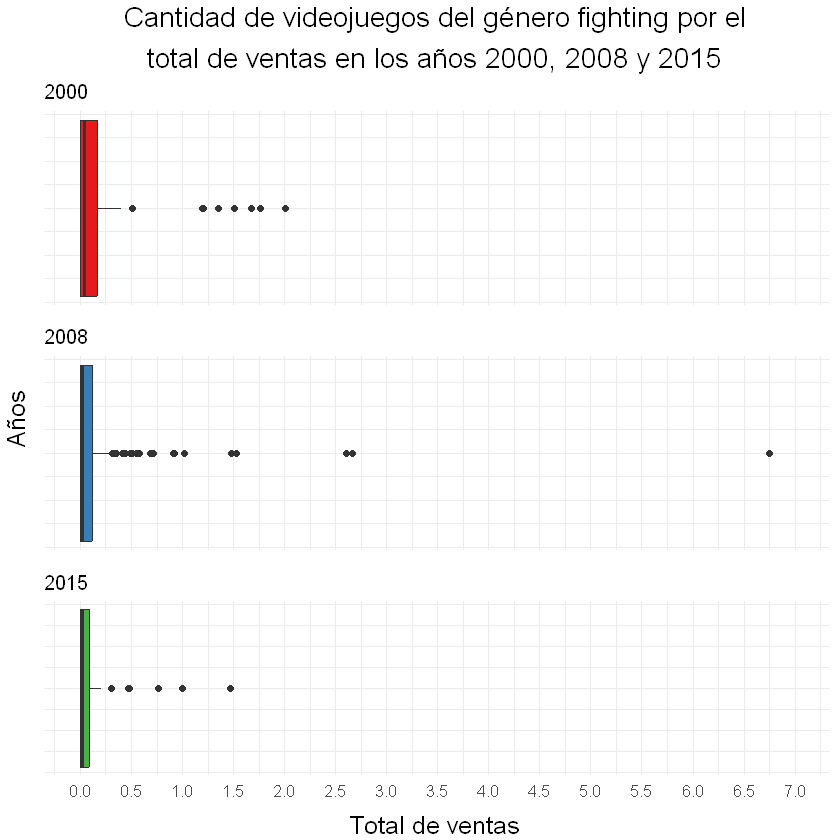

In [10]:
# 1: Año 2000
gg1 <- juegos %>%
 filter(Genre == "Fighting" & Year == 2000) %>%
  ggplot() + 
  geom_boxplot(aes(x = Sales, fill = factor(Year))) +
  scale_x_continuous(limits = c(0, 7), breaks = seq(0, 7, by = 0.5)) + 
  scale_fill_manual(values = colores[1]) +  # Utilizar la paleta de colores personalizada
  guides(fill = FALSE) + 
  guides(color = guide_legend(nrow = 2)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 10, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.text.x = element_blank(),  # Ajustar el tamaño de fuente del título del eje x
    axis.text.y = element_blank()  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = NULL,
    title = '2000',
    y = NULL,
    x = NULL
  )

# 2: Año 2008
gg2 <- juegos %>%
 filter(Genre == "Fighting" & Year == 2008) %>%
 ggplot() +
  geom_boxplot(aes(x = Sales, fill = factor(Year))) +
  scale_x_continuous(limits = c(0, 7), breaks = seq(0, 7, by = 0.5)) + 
  scale_fill_manual(values = colores[2]) +  # Utilizar la paleta de colores personalizada
  guides(fill = FALSE) + 
  guides(color = guide_legend(nrow = 2)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 10, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.text.x = element_blank(),  # Ajustar el tamaño de fuente del título del eje x
    axis.text.y = element_blank()  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = NULL,
    title = '2008',
    y = NULL,
    x = NULL
  )


# 3: Año 2015
gg3 <- juegos %>%
 filter(Genre == "Fighting" & Year == 2015)%>%
 ggplot() + 
  geom_boxplot(aes(x = Sales, fill = factor(Year))) +
  scale_x_continuous(limits = c(0, 7), breaks = seq(0, 7, by = 0.5)) + 
  scale_fill_manual(values = colores[3]) +  # Utilizar la paleta de colores personalizada
  guides(fill = FALSE) + 
  guides(color = guide_legend(nrow = 2)) +  # Organizar la leyenda en dos filas
  theme_minimal() +
  theme(
    legend.position = "top",  # Posicionar la leyenda en la parte superior
    legend.direction = "horizontal",  # Orientar la leyenda horizontalmente
    text = element_text(size = 12),  # Ajustar el tamaño de fuente del texto del gráfico
    title = element_text(size = 10, hjust = 0.5),  # Ajustar el tamaño de fuente del título
    legend.text = element_text(size = 8),  # Ajustar el tamaño de fuente del texto de la leyenda
    axis.title.x = element_text(size = 13),  # Ajustar el tamaño de fuente del título del eje x
    axis.text.y = element_blank()  # Ajustar el tamaño de fuente del título del eje y
  ) +
  labs(
    color = NULL,
    title = '2015',
    y = NULL,
    x = NULL
  )

# Juntar los dos gráficos creados
grid_arrange <- grid.arrange(
    gg1,gg2, gg3,
    ncol = 1,
    # Wirte left text
    bottom = textGrob("Total de ventas", 
                    gp = gpar(fontsize=15)),
    # Wirte bottom text
    left = textGrob("Años", gp=gpar(fontsize = 15), rot = 90),
    
    top = textGrob("Cantidad de videojuegos del género fighting por el\ntotal de ventas en los años 2000, 2008 y 2015", gp=gpar(fontsize = 17))
)

ggsave("graphs\\p4.pdf", plot = arrangeGrob(grid_arrange), device = "pdf",
      width = 26, height = 16, units = "cm", dpi = 600)
